# Estatística & Probabilidade - 2022/02

## Projeto 02 - Uma introdução ao aprendizado de máquina

### Ana Carolina Ferreira de Figueiredo

#### 121044191

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é sábado 06/01/2023 às 23h59. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, e o projeto deve ser redigido na forma de um relatório incluindo os códigos. Para isso, use a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em ``Atividades"
            
  - No tema "Projetos", clique em "Projeto 02" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 02".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada aluno deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

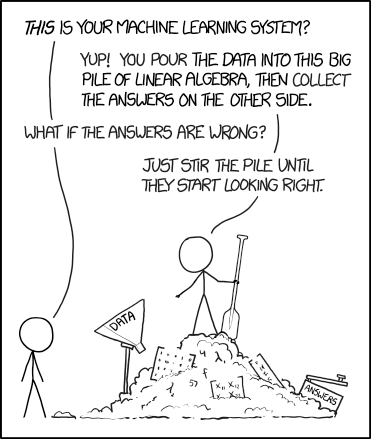

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})) = \begin{cases} 0, &\text{ se } Y = g(\mathbf{X}) \\ 1, &\text{ se } Y \neq g(\mathbf{X}) \end{cases}$$

Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo ou discreto
- Se $\mathbf{X}$ é contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes


### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados.

In [ ]:
# Baixando a base de dados

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

In [ ]:
# Vendo o cabeçalho referente à X, bem como seu tamanho

print(X.shape)
X.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Vendo o cabeçalho referente à y, bem como seu tamanho

print(y.shape)
y.head()

(70000,)


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

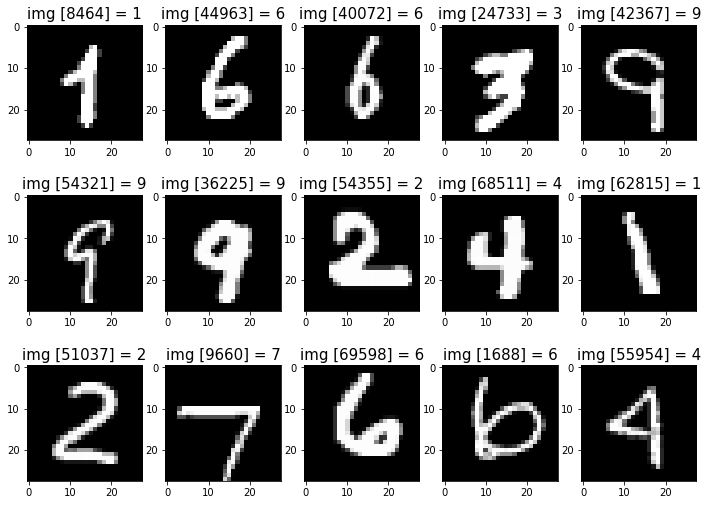

In [ ]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1
    for x in zip(images, title_texts):
        image = x[0].reshape(28, 28)
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 8


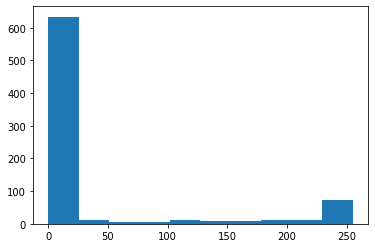

In [ ]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando o classificador de Bayes ingênuo gaussiano que discutimos acima.

**QUESTÃO 1:** O classificador de Bayes ingênuo Gaussiano tem duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

No cenário apresentado, temos um conjunto de vetores x, que consistem de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255, chamados de atributos; as imagens são aquilo que observamos, os vetores são as representações dessas imagens dentro do computador, com cada posição do vetor representando um pixel da imagem. Já a classificação das imagens pelos digitos que elas representam são as clases ou rótulos, conjunto finito de 0-9 que são atribuídos a esses vetores aleatórios. A variável aleatória Y, pode assumir valores dentro do conjunto de classes, ou seja de 0-9. Dentro do problema, cada vetor x terá uma variável Y associada, que determina o digito que corresponde a determinada imagem. Assim, temos a seguinte situação, um conjunto de imagens que desejamos classfificar de acordo com o digito que representam. Para tal, utilizams o classificador de Bayes ingênuo Gaussiano, que procura a partir de um conjunto de observações, os atributos, encontrar uma função que consiga prever bem a classe associada à novas observações fora do conjunto de observações original (a base de dados utilizada no problema), onde os atributos são considerados independentes quando associados as classes e são descritos por distriuições normais. Não é tão razoável pensar nas imagens como independentes umas as outras quando associadas a um determinado digito, uma vez que podemos entender que as distribuição dos pixels de diferentes cores na imagem dependem unicamente do formato que pretendem apresentar, ou seja o digito que estão reproduzindo. entretanto, quando acrescentamos o fato de que existem diferentes formas de representar um único digito, que depende unicamente da caligrafia e dos movimentos de escrita da pessoa que desenhou aquele número, podemos entender as imagens como independentes umas das outras quando condicionadas a um determiando digito. Como podemos verificar abaixo:

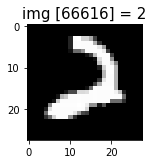

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='2'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

Embora descreva distribuições que possuem um certo padrão, assim como no problema existe um padrão onde as variaveis aleatorias se concentram principalmente em torno dos valores 0 e 255, a distribuição de probabilidade normal é uma distribuição de probabilidade contínua e simétrica em ambos os lados da média, de modo que o lado direito é uma imagem espelhada do esquerdo, onde a maioria dos valores de dados nesta distribuição tendem a se agrupar em torno da média e as caudas são assintóticas, o que significa que, teoricamente, se estende de – infinito a + infinito, sem tocar o eixo horizontal, o que se difere bastate do modelo do problema, que mais se parece com uma sequência de distribuições normais. A seguir, os graficos da distribuição dos atributos e de um modelo de distribuição normal:

Dígito: 6


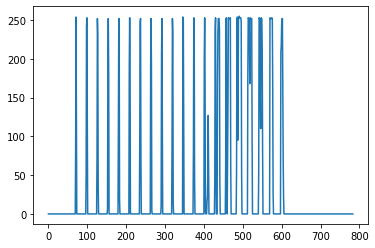

In [ ]:
r = np.random.randint(1, 70000)
plt.plot(X.values[r])
print('Dígito:', y[r])
plt.show()

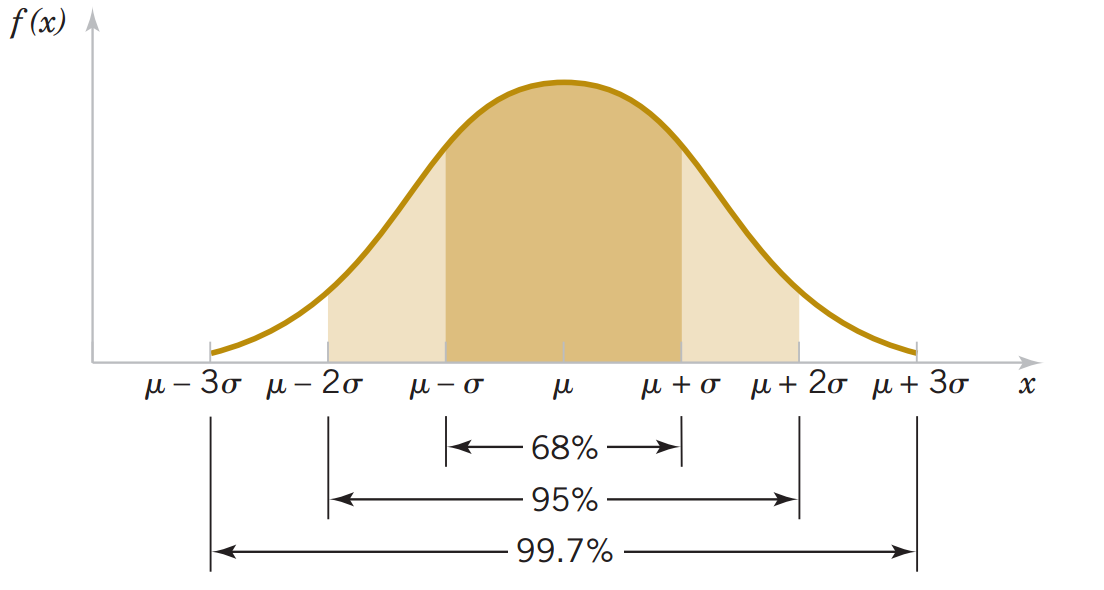

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

In [ ]:
# ATENÇÃO! Se você rodar essa célula mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso para evitar erros numéricos.

X = X/255

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** A classe que vamos usar para fazer o nosso procedimento é a `GaussianNB`, localizada dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), e a página direcionada através do *link* "User Guide", onde encontra-se a formulação matemática por trás do método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

No metodo de classificação do classificador de Bayes ingênuo gaussiano, trabalhamos com p atributos com n observações de cada, onde os dados observados formam uma X matriz n×p em que cada linha é uma realização do vetor aleatório contínuo X∈Rp. A variável resposta Y∈C assumi valores para n observações. Como X é contínuo, temos que:
$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

P(Y=d) estimado através da proporção amostral entre as classes e assumimos um modelo probabilístico em X para estimar q(X=x|Y=d), para d∈C: condicionando à classe, as componentes de X são independentes, assim *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


$X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

Por outro lado, temos a classe GaussianNB capaz de realizar atualizações nos parâmetros do modelo pelo método fit (aquele que realiza o trainamento do classificador a partir de uma matriz que contém seus atributos, um vetor que contém a classificação de cada observação e a possibilidade de passar o peso aplicado nas amostras). Com isso, caso hajam novas observações, não sera necessario calcular a média de todos os parâmetros para atualizar os valores antigos. Além disso, ainda conta com os métodos predict, que realiza a predição de classificação de um conjunto de observações se baseando no trainamento realizado e predict_proba, calcula a probabilidade do conjunto de observações ser classificado com cada um dos rótulos, retornando uma matriz mxc, onde o elemento na possição mxc indica a probabilidade da amostra m ser da classificação c.

**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` para treinar um modelo de Bayes ingênuo gaussiano nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb.predict(X_test)

array(['9', '6', '9', ..., '2', '2', '9'], dtype='<U1')

In [ ]:
nb.predict_proba(X_test)

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        9.89890481e-288, 1.74805611e-120, 1.00000000e+000],
       [1.40207388e-063, 0.00000000e+000, 1.43277733e-099, ...,
        0.00000000e+000, 2.15567239e-286, 0.00000000e+000],
       [7.41026837e-175, 0.00000000e+000, 3.96329238e-272, ...,
        6.31840762e-260, 1.91389881e-016, 1.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000, ...,
        0.00000000e+000, 4.75630346e-278, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.15610193e-151, 2.42589274e-168, 1.00000000e+000]])

A função predict executa uma previsão, classifica uma matriz de vetores de teste X, tem como parâmetros um array X, que seriam as amostras de entrada e retorna um array com os valores-alvo previstos para X, ou seja, classifica cada imagem de acordo com o digito que acredita representar.

A função predict_proba tenta estimar a probabilidade de retorno para o vetor de teste X, tem como parâmetros um array X, que seriam as amostras de entrada e retorna um array com a probabilidade das amostras para cada classe no modelo, ou seja a probabilidade de uma imagem ser classificada como cada digito. As colunas correspondem às classes em ordem de classificação (digitos de 0 à 9).

**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

Considerando que teremos uma média e uma variância para cada atributo para cada classe, temos 2 parâmetros para 784 atributos para 10 classes, ou seja temos 15680 parâmetros. Assim, podemos averiguar que apesar do número de parâmentros a serem estimados ser maior do que as observações que conhecemos, o número de fatores a serem determinados é bastante significativo, se distanciando da idéia da estatistica classica que definia um número de observações extremamente maior que o de parâmetros.

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

Uma matriz de confusão, é um tipo de tabela específico que permite a visualização do desempenho de um algoritmo, normalmente um aprendizado supervisionado. Cada linha da matriz representa as instâncias em uma classe real, enquanto cada coluna representa as instâncias em uma classe prevista, ou vice-versa. No problema modelado, a tabela contaria com 10.000 colunas, uma para cada observação avaliada, uma linha com os valores de Y referentes ao conjunto teste, as classificações reais de cada observação, e uma linha com os resultados do classificador referentes a cada uma das observações do conjunto teste. Com isso, as duas linhas são comparadas a fim de quantificar os resultados verdadeiros previstos pelo classificador, possibilitando averiguar sua taxa de acerto e consequentemente, sua qualidade.

Em uma problema de classificação binário teriamos 4 resultados diferentes em qualquer coluna específica, visto que os atributos são classificados somente como positivos ou negativos. Primeiro, se a classificação real for positiva e a classificação prevista for positiva (1,1), isso é chamado de resultado verdadeiro positivo porque a amostra positiva foi identificada corretamente pelo classificador. Dois, se a classificação real for positiva e a classificação prevista for negativa (1,0), isso é chamado de resultado falso negativo porque a amostra positiva é identificada incorretamente pelo classificador como sendo negativa. Em terceiro lugar, se a classificação real for negativa e a classificação prevista for positiva (0,1), isso é chamado de resultado falso positivo porque a amostra negativa é incorretamente identificada pelo classificador como positiva. Quarto, se a classificação real for negativa e a classificação prevista for negativa (0,0), isso é chamado de resultado negativo verdadeiro porque a amostra negativa é identificada corretamente pelo classificador. No caso do problema debatido, teríamos 2 elevado a 10 resultados diferentes em qualquer coluna específica, visto que os atributos são classificados em inteiros de 0 à 9. Ou seja, temos 10 resultados consistentes, em que a classificação real é um inteiro x qualquer entre 0 e 9, e o classificação prevista é x e 2 elevado a 10 - 10 resultados inconscistentes, em que o classificador real é um inteiro x qualquer entre 0 e 9, e o classificação prevista é um inteiro y entre 0 e 9, mas diferente de x.

Precisão é o grau de variação de resultados de uma medição, o quão próximas as medições estão umas das outras, é o grau em que medições repetidas sob condições inalteradas mostram os mesmos resultados. Não é o mesmo que exatidão, que se refere à conformidade com o valor real, nem o mesmo que acurácia que é o quão próximo um determinado conjunto de medições (observações ou leituras) estão de seu valor real, é o grau de proximidade das medições de uma quantidade com o valor real dessa quantidade. A precisão tem como base o desvio-padrão de uma série de repetições da mesma análise. Um sistema de medição pode ser exato, mas não preciso, preciso, mas não exato, nenhum ou ambos, mas só é considerado válido se for exato e preciso.

A acurácia também é usada como uma medida estatística de quão bem um teste de classificação estabelece previsões corretas  entre o número total de casos examinados, comparando estimativas de probabilidade pré e pós-teste. Ao calcular a acurácia na classificação multiclasse, a precisão é simplesmente a fração de classificações corretas:

f0453f2614cd29f5dd49c2c9a0ef807985128e9e.svg



A função score retorna a precisão média nos dados e rótulos de teste fornecidos, comparando o array Y que contém os rótulos verdadeiros para X com os resultados fornecidos pela função self_predict, que funciona de forma análoga a função predict discutida anteriormenete, retornando a classificação prevista pelo classificador. Assim, podemos perceber que a função score mede a acurácia de um classificador de forma bastante similiar ao funcionamente da matriz de confusão, uma vez que para cada observação é comparado a classificação real com a prevista, em conjunto das definições previamente discutidas, colocando o número de previsões corretas obtidas pelas comparações sobre o número total de classificações.

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.5544


Quando falamos em aferir a qualidade do classificador, nos referimos ao conjunto teste, pois o classificador foi formatado a partir do conjunto de treinamento, ele conhece de certa forma os elementos desse conjunto então para averigar sua qualidade de previsão, é preciso avalia-lo a partir de sua capacidade de prever as classificações de elementos novos, elementos que desconhece, ou seja o conjunto de teste.

**QUESTÃO 6:** Use o código dado abaixo para exibir a matriz de confusão, bem como uma representação gráfica mais amigável dela. Analise os erros cometidos pelo classificador e tente justificá-los, com base nas hipóteses do classificador e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional de nosso classificador! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

[[ 860    2    4    4    3    3   43    1   54   12]
 [   1 1062    4    7    0    0   15    1   24   11]
 [  92   34  271   49    1    2  274    3  261   12]
 [  42   55    8  332    4    2   85    3  397   92]
 [  20    7    8    5  125    4  127    6  206  467]
 [  84   26    3   16    3   40   55    0  583   92]
 [  11   17    7    2    2    5  918    0   20    0]
 [   4   10    2   11    7    1    4  343   42  618]
 [   6  139    5    4    1    5   25    1  654  135]
 [   2    9    3    1    4    1    0   12   23  939]]


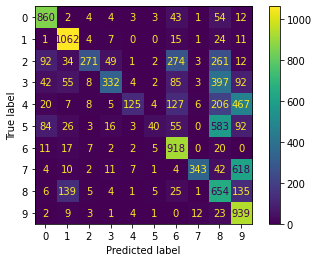

In [ ]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.
y_test_pred=nb.predict(X_test)
labels = y.cat.categories
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

O classificador possui boas taxas de predição quando se trata da classificação de imagens que representam os digitos 0, 1, 6 e 9, sendo o número de vezes em que classificador errou, quando se tratava desses digitos, insignificante quando comparado com o número total de classificações. Portanto, para classificação de tais digitos especificamenete acredito que o classificador seja de exrema qualidade, caso esse seja o interesse. Com base numa análise feita na base de dados, brevemente demonstrada abaixo, é perceptível como as imagens que representam tais digitos não possuem muitas variâncias entre elas, o digito 0 por exemplo dispoem de uma distribuição de pixels brancos na imagem muito similares entre si, exatamente por ser muitas vezes representado como um circulo, o que torna o trabalho do classificador mais fácil, uma vez que durante seu treinamento se deparou com diversas imagens com representações circulares simples e poucos distintas entre si classificadas como 0. O mesmo raciocínio vale para o digito 1, muitas vezes representado como um traço vertical. Já os digitos 6 e 9, ao obervar um cnjunto de imagens da base de dados identifiquei que tais digitos, apesar de possuírem formatos mais elaborados, ainda não possuem muita variância entre si e mais importante não se assemelham aos demais digitos, em questão de disposição de pixels. Até mesmo o digito 9 podendo ser confundido com o digito 7, e o 6 podendo ser confundido pelo número 2, dependendo do cuidado com que fossem escritos, não impediram a predição correta pelo classificador.

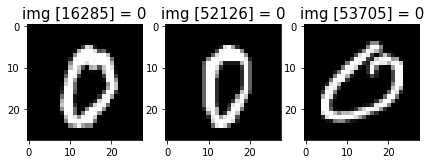

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='0'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

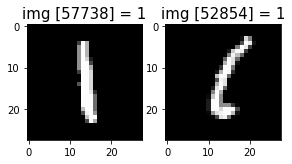

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='1'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

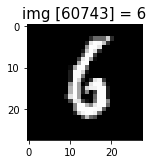

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='6'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

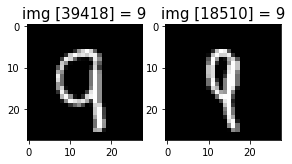

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='9'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

O classificador possui uma taxa próxima a 50% de chance de acerto nas predições de clssificação para o digito 5 e baixas taxas de acerto para os demais digitos, sendo o número de vezes em que classificador errou, quando se tratava desses digitos, considerável quando comparado com o número total de classificações. Portanto, para classificação de tais digitos especificamenete acredito que o classificador não seja muito eficaz. A partir de uma análise da base de dados que continha as imagens que representaam tais digitos, nítido que as diversas imagens que representam os digitos 2, 3, 4, 7 e 8 possuem grandes variâncias entre si, seja pelas duas maneiras existentes de represenar o digito 2, incluindo o circulo ou não, pela opção de inserir um traço vertical no digito 7 ou não, pela preferência em prolongar o raço vertical do digito 4 ou não, ou pelas diferenças gritantes de traços particulares de cada imagem e pela falta de cuidado no momento da escrita de alguns números (em algumas imagens que representam o digito 8, os traços não foram conectados, e em algumas do digito 3 foram excessivamente prolongados quase se conectando, gerando espaço para confusão na hora de classifcarmos tais imagens), gerando distribuições de pixels bastente irregulares. Isso se reflete bastante nos resultados obtidos pela matriz de confusão que indica como esse números não só obtidos baixas taxas de acerto, como também obtiveram taxas de erros distribuídas entre os demais digitos, ou seja os digitos 2, 3, 4, 7 e 8 foram confundidos com certa frequência não somente com um digito, mas com vários, demonstrando que poderiam se assemelhar a representações diferentes e diversas.

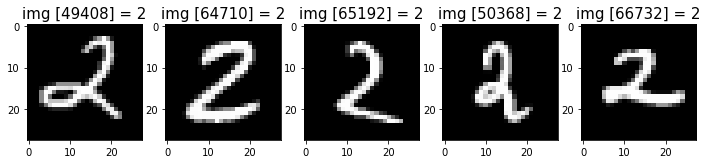

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='2'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

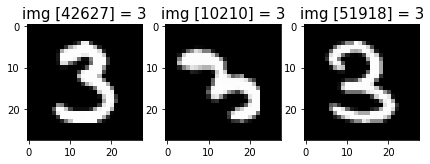

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='3'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

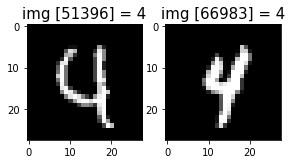

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='4'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='7'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

<Figure size 864x864 with 0 Axes>

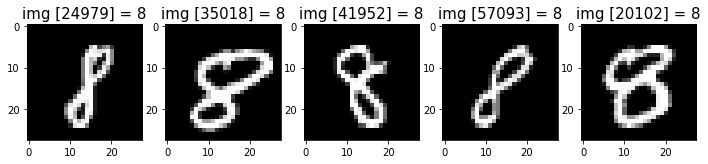

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='8'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

Além disso, tratando especificamente das imagens que representam o digito 5, por meio de um exame na base de dados, também é possivel encontrar um grande número de representações diversas entre si. Entretanto, o digito 5 é um digito que de certa forma é bastante particular quando comparado aos demais. Os digitos 3 e 8 por exemplo, se assemelham bastante pela natureza de seus formatos. Já o digito 5 não se assemelha tanto aos demais, e até mesmo, considerando os digitos que mais se parecem com ele, devido a uma maior consistência de fomratos do digito 5 nas imagens da base de dados, verificamos que a taxa de acerto se manteve em 50%.

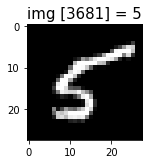

In [ ]:
exemples_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    if(y[r]=='5'):
      exemples_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))
show_images(list(map(lambda x: x[0], exemples_images)), list(map(lambda x: x[1], exemples_images)))

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
linhas=len(cm)
colunas=len(cm[0])
soma=0
for i in range(0,linhas):
  for j in range(0,colunas):
    if(j==i):
      soma+=cm[i][j]
soma

5544

Como descrito anteriormenete a acurácia de uma classificação multiclasse é definida pelo número de predições certas sobre o número de predições totais, logo a acurácia do classificador desenvolvido é 5544/10000=0,55 o que equivale a aproximadamente 55% de acurácia.

De forma geral, acredito que o classificador seja de fato bom, considerando uma base de dados pouco consistente e a simplicidade e baixos custos que sua implementação demandou. Embora bons algoritmos, na minha opinião, serem responsáveis por exercer um bom funcionamento apesar de recorrentes impresições nas bases de dados, o classificador em questão não requereu muitos recursos ou esforços, estes que poderíam contribuir para maior desenvolvimento do calssificador. Então pesando tais fatos, concluo que nosso classificador é "bom".

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

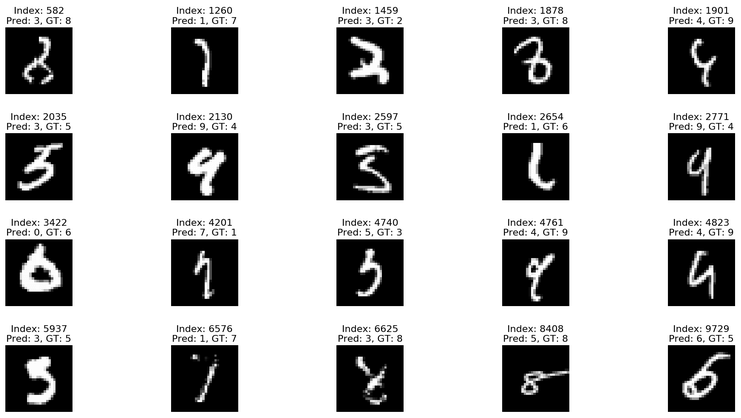

Considerando que as duas hipóteses iniciais utilizadas para a modelagem do problema não são as ideais, acredito que como primeira alternativa, poderiamos não assumir a independência entre os pixels da imagem e modelar o problema por meio de outra distribuição de probabilidade, diferente da normal.